In [1]:
import json
from openai import OpenAI
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mapping = {"CAUSE": 'cause', 'TREAT': 'treat', 'PRESENT': 'present', 'AGGRAVATE': 'aggravate', 'PREVENT': 'prevent', 'IMPROVE': 'improve', 'AFFECT': 'affect'}
mapping_types = {'DISEASE': '<disease>', 'SYMPTOM': '<symptom>', 'TREATMENT': '<treatment>', 'RISK-FACTOR': '<risk-factor>',
                 'TEST': '<test>', 'GENE': '<gene>', 'BIOMARKER': '<biomarker>', 'COMPLICATION': '<complication>',
                 'PROGNOSIS': '<prognosis>', 'COMORBIDITY': '<comorbidity>',
                 'PROGRESSION': '<progression>', 'BODY-PART': '<body-part>'}

In [3]:
ANNOTATED_ABSTRACTS = "../../data/Evaluation/20_annotated_abstracts.jsonl"
EXTRACTED_RELATIONS = "../../data/Evaluation/extracted_relations.jsonl"
EXTRACTED_ABSTRACTS = "../../data/Evaluation/extracted_abstracts.jsonl"
GPT_EXTRACTED_RELATIONS = "../../data/Evaluation/GPT_extracted.txt"

In [4]:
with open(ANNOTATED_ABSTRACTS) as json_file, open(EXTRACTED_RELATIONS, 'w') as outfile, open(EXTRACTED_ABSTRACTS, 'w') as outfile2:
    json_list = list(json_file)
    for id_, x in enumerate(json_list):
        triplets = ""
        row = json.loads(x)
        json.dump({"abstract": row["text"]}, outfile2)
        outfile2.write('\n')
        if 'relations' in row.keys():
            for relation in row['relations']:
                first_part = ' '.join([token['text'] for token in row['tokens'][relation['head_span']['token_start']:relation['head_span']['token_end'] + 1]])
                second_part = ' '.join([token['text'] for token in row['tokens'][relation['child_span']['token_start']:relation['child_span']['token_end'] + 1]])
                triplet = {"abstract": id_, "subject": first_part, "relation": mapping[relation["label"]], "object": second_part}
                json.dump(triplet, outfile)
                outfile.write('\n')

In [5]:
with open(GPT_EXTRACTED_RELATIONS, 'r') as file:
    lines = file.readlines()

parsed_entries = []

json_pattern = re.compile(r'\{.*?\}')

for line_number, line in enumerate(lines):
    matches = json_pattern.findall(line)
    for match in matches:
        cleaned_match = match.replace("'", '"')
        try:
            parsed_entry = json.loads(cleaned_match)
            new_entry = {
                "abstract": line_number,
                "subject": parsed_entry.get('entity1_name', ''),
                "relation": parsed_entry.get('relation_type', ''),
                "object": parsed_entry.get('entity2_name', '')
            }
            parsed_entries.append(new_entry)
        except json.JSONDecodeError:
            continue

gpt_extracted_relations = pd.DataFrame(parsed_entries)

print(gpt_extracted_relations.head())

   abstract                           subject relation  \
0         0  Age-related macular degeneration  present   
1         0                   neovascular AMD    cause   
2         0              Photodynamic therapy    treat   
3         0              Photodynamic therapy   affect   
4         0      Transpupillary thermotherapy    treat   

                         object  
0                        macula  
1                   haemorrhage  
2         neovascular membranes  
3                        retina  
4  choroidal neovascularization  


In [6]:
with open(EXTRACTED_RELATIONS, 'r') as file:
    lines = file.readlines()

entries = []

for line in lines:
    try:
        entry = json.loads(line)
        entries.append(entry)
    except json.JSONDecodeError:
        # Handle JSON decoding errors, if any
        continue

annotated_relations = pd.DataFrame(entries)

annotated_relations.head()

,abstract,subject,relation,object
0,0,choroidal neovascularization,treat,photodynamic therapy
1,0,choroidal neovascularization,treat,transpupillary thermotherapy
2,0,age - related macular degeneration,cause,choroidal neovascularization
3,0,AMD,affect,macula
4,0,AMD,affect,the central area of the retina


/var/folders/v4/3yfsjs7s18jd91046b1bbmmc0000gn/T/ipykernel_94906/2857573828.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


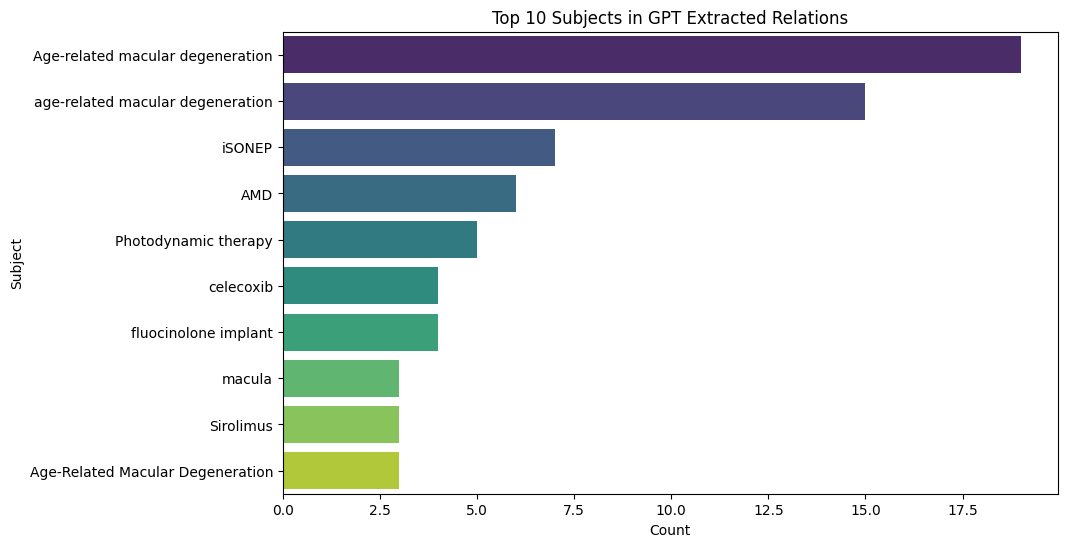

/var/folders/v4/3yfsjs7s18jd91046b1bbmmc0000gn/T/ipykernel_94906/2857573828.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


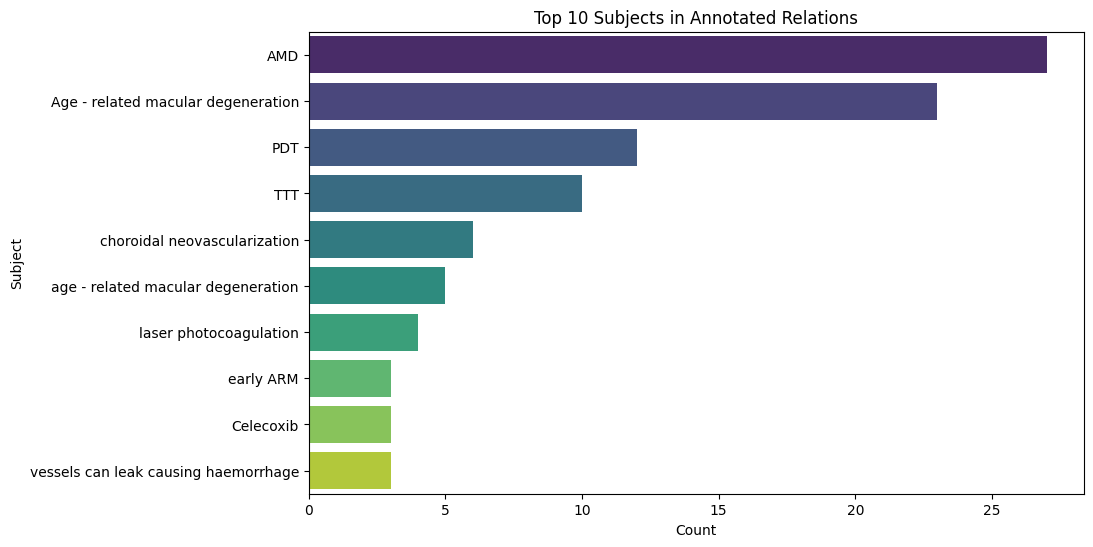

/var/folders/v4/3yfsjs7s18jd91046b1bbmmc0000gn/T/ipykernel_94906/2857573828.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


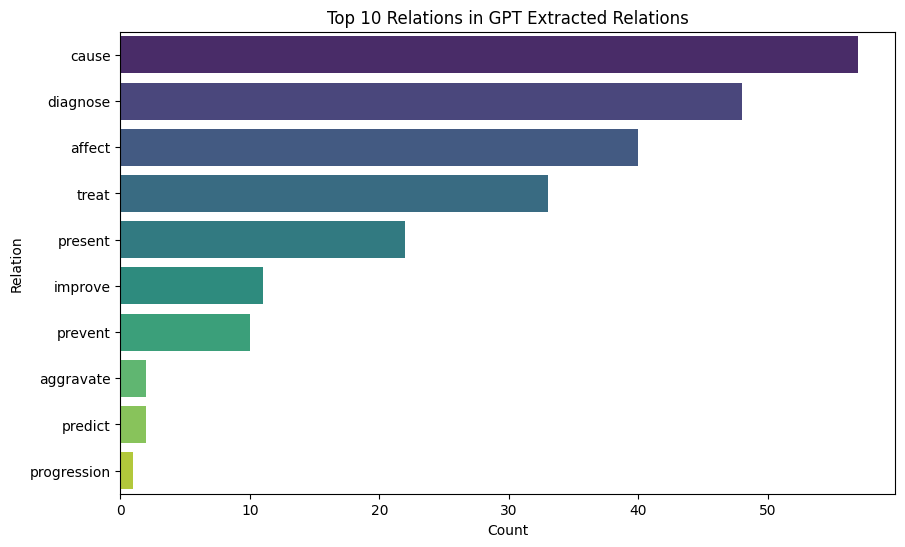

/var/folders/v4/3yfsjs7s18jd91046b1bbmmc0000gn/T/ipykernel_94906/2857573828.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


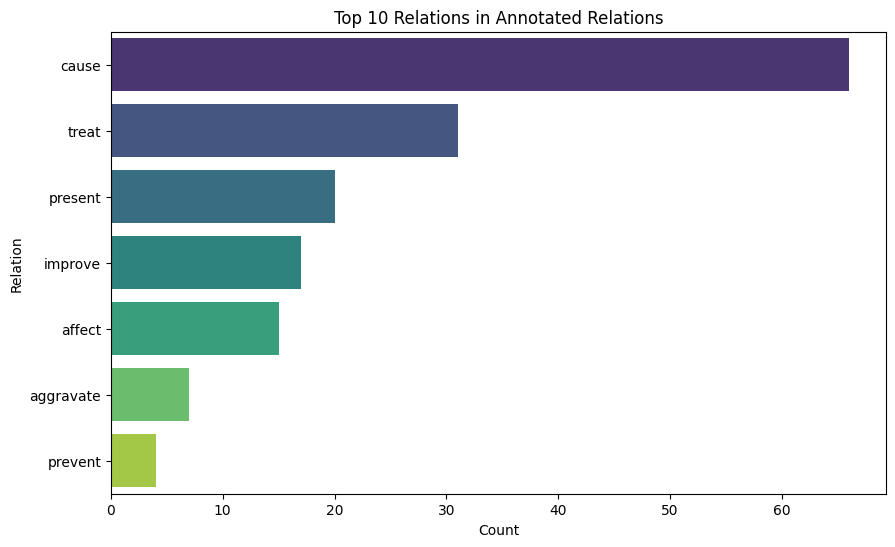

/var/folders/v4/3yfsjs7s18jd91046b1bbmmc0000gn/T/ipykernel_94906/2857573828.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


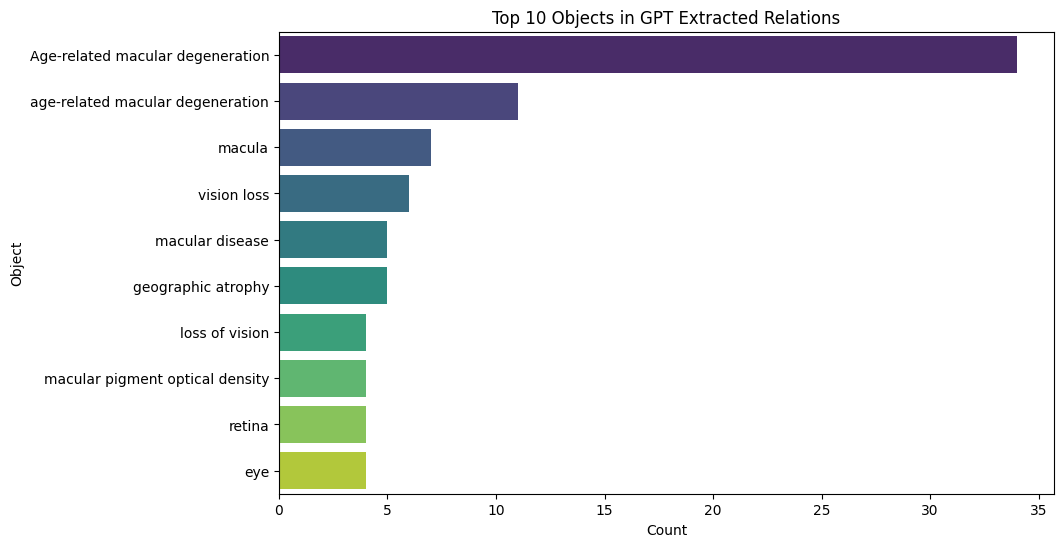

/var/folders/v4/3yfsjs7s18jd91046b1bbmmc0000gn/T/ipykernel_94906/2857573828.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')


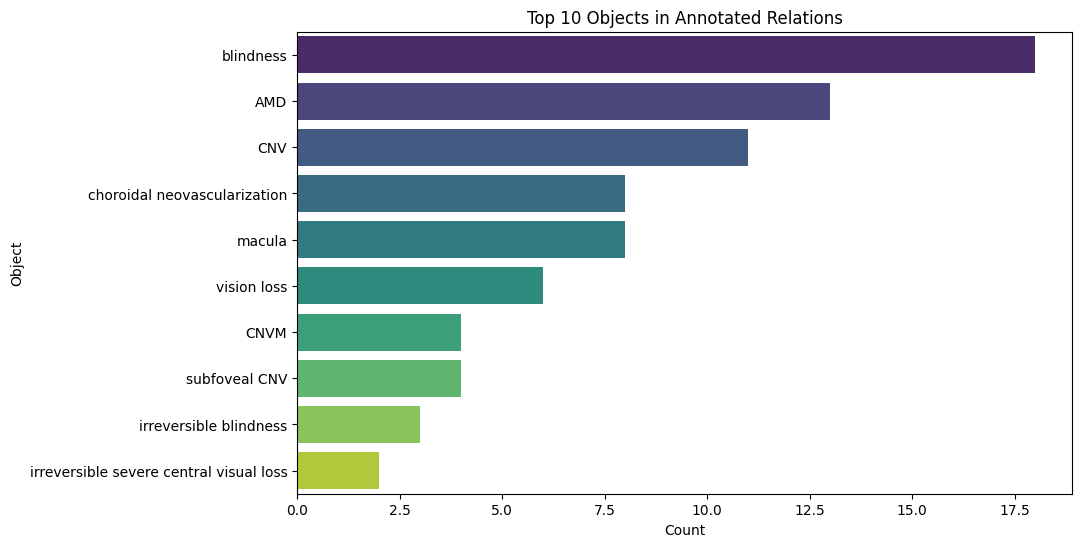

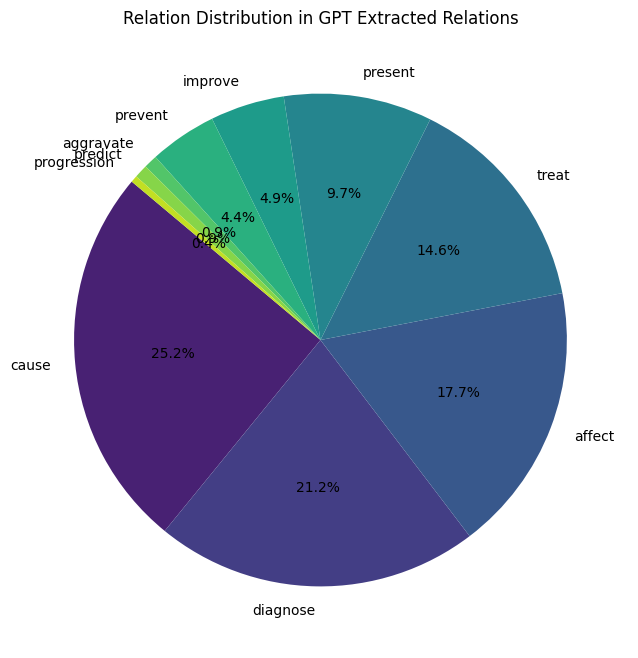

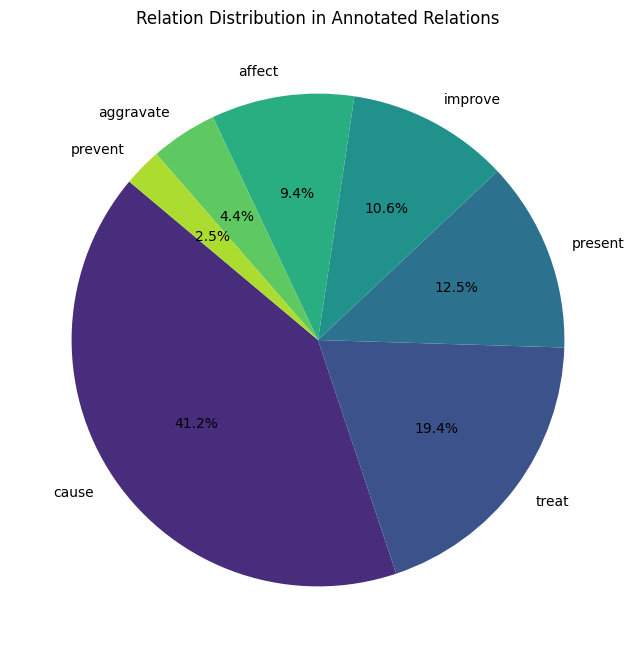

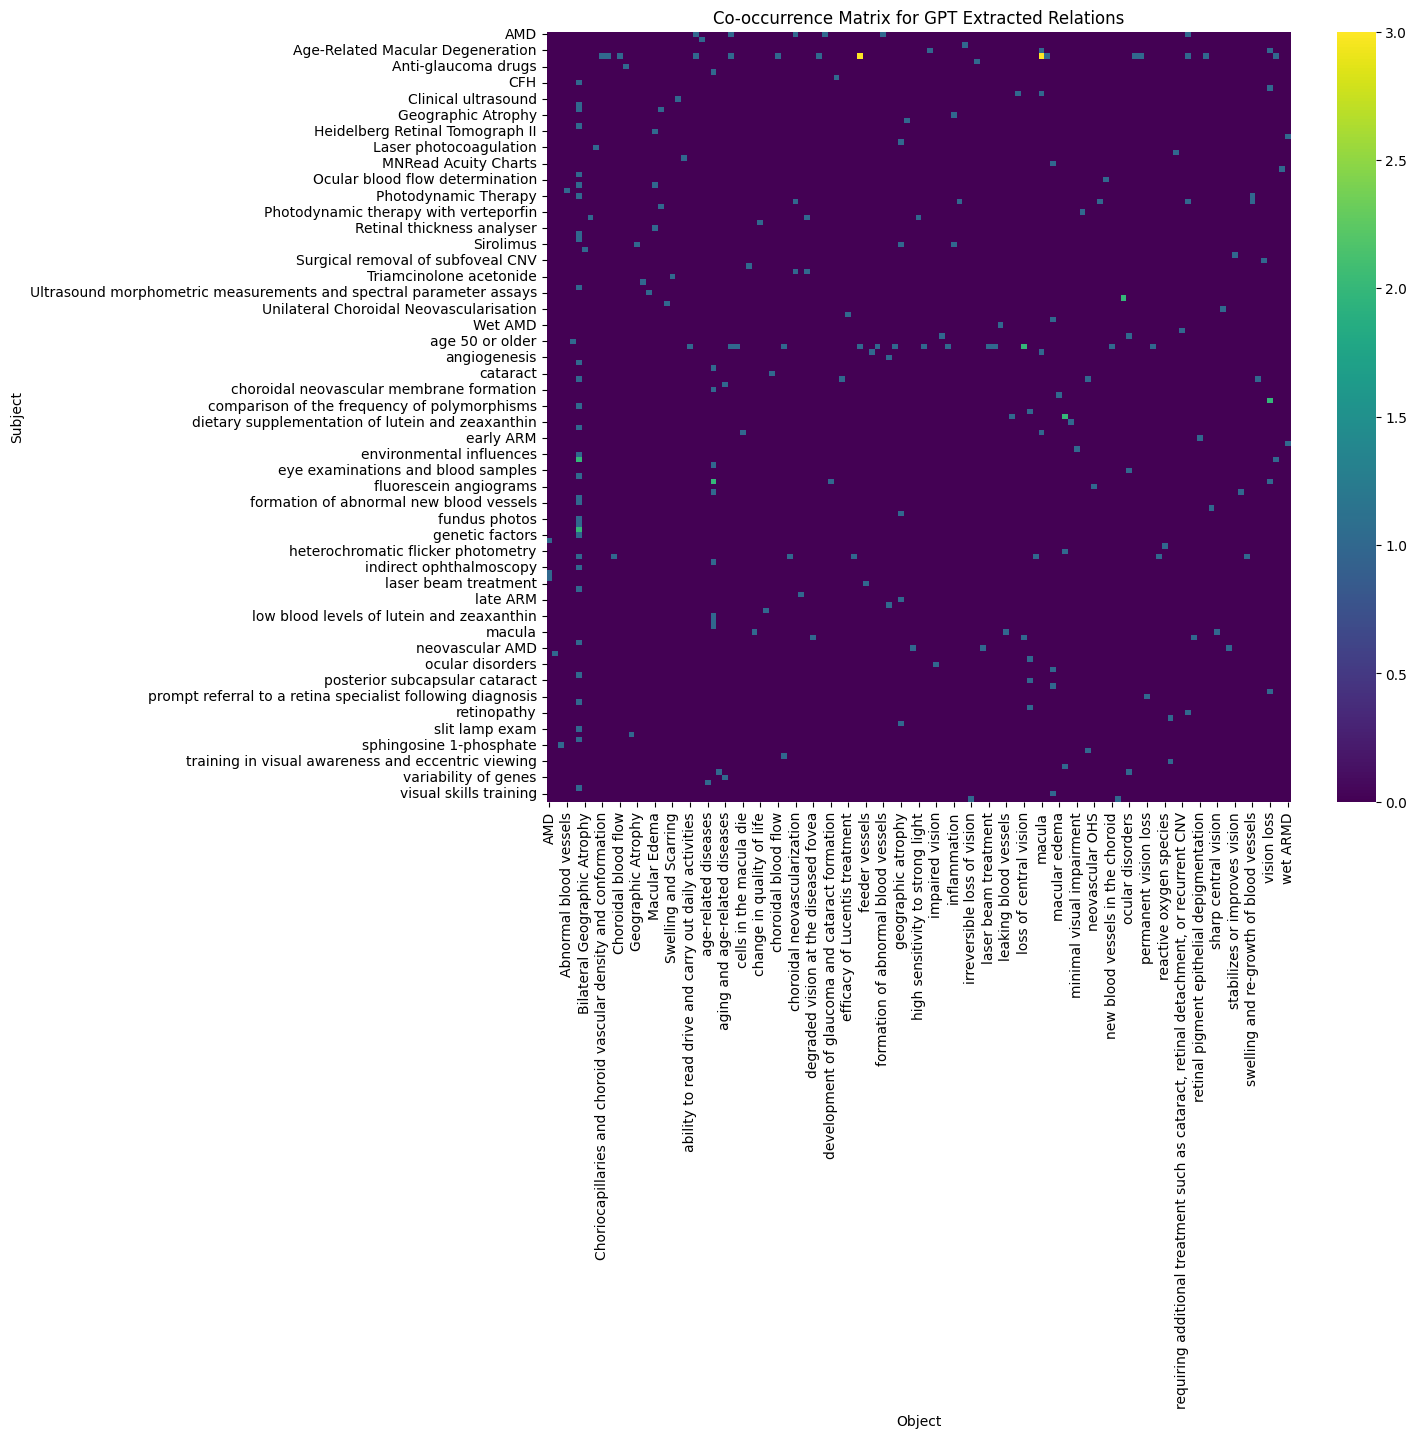

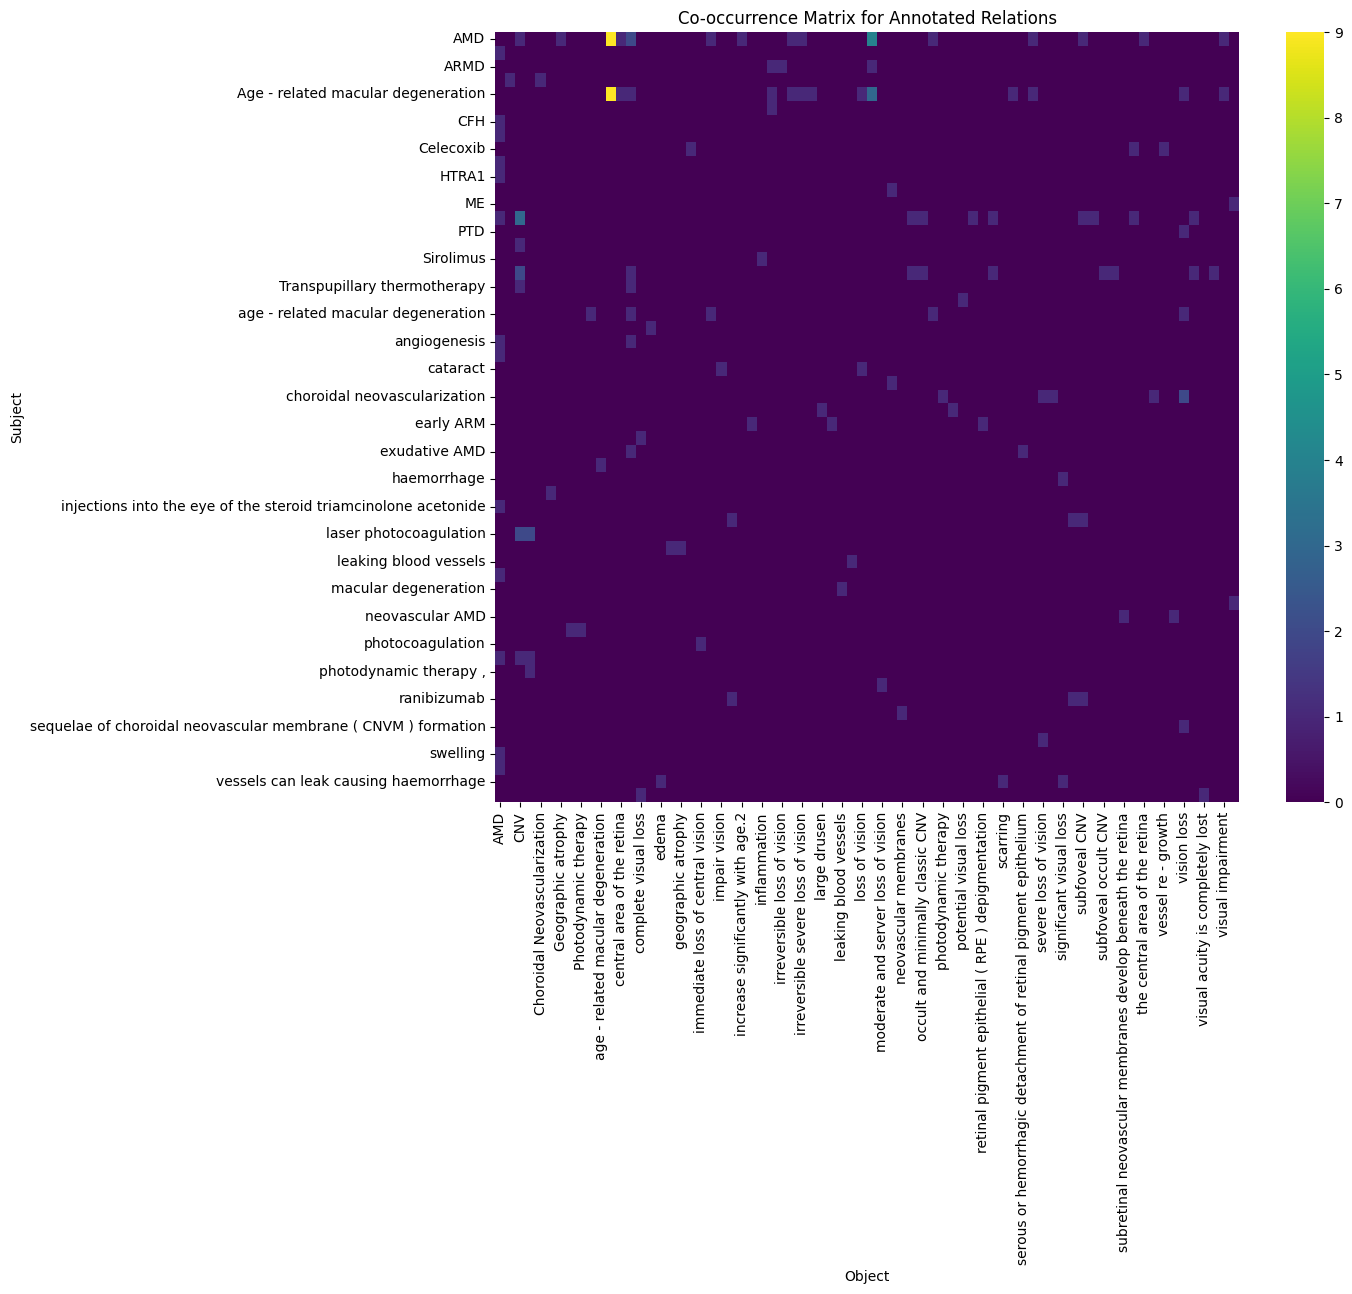

Match Rate: 0.06


In [7]:
def calculate_statistics(df, name):
    stats = {
        'Name': name,
        'Total Entries': len(df),
        'Unique Subjects': df['subject'].nunique(),
        'Unique Relations': df['relation'].nunique(),
        'Unique Objects': df['object'].nunique(),
        'Top Subjects': df['subject'].value_counts().head().to_dict(),
        'Top Relations': df['relation'].value_counts().head().to_dict(),
        'Top Objects': df['object'].value_counts().head().to_dict(),
    }
    return stats

gpt_stats = calculate_statistics(gpt_extracted_relations, 'GPT Extracted Relations')
annotated_stats = calculate_statistics(annotated_relations, 'Annotated Relations')

stats_df = pd.DataFrame([gpt_stats, annotated_stats])

gpt_relation_distribution = gpt_extracted_relations['relation'].value_counts(normalize=True).to_frame(name='GPT Relation Distribution')
annotated_relation_distribution = annotated_relations['relation'].value_counts(normalize=True).to_frame(name='Annotated Relation Distribution')

gpt_cooccurrence = pd.crosstab(gpt_extracted_relations['subject'], gpt_extracted_relations['object'])
annotated_cooccurrence = pd.crosstab(annotated_relations['subject'], annotated_relations['object'])

def match_rate(df1, df2):
    merged = pd.merge(df1, df2, on=['subject', 'relation', 'object'], how='inner')
    return len(merged) / min(len(df1), len(df2))

match_rate_value = match_rate(gpt_extracted_relations, annotated_relations)

def plot_top_entities(df, entity, title):
    top_entities = df[entity].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_entities.values, y=top_entities.index, palette='viridis')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(entity.capitalize())
    plt.show()

plot_top_entities(gpt_extracted_relations, 'subject', 'Top 10 Subjects in GPT Extracted Relations')
plot_top_entities(annotated_relations, 'subject', 'Top 10 Subjects in Annotated Relations')
plot_top_entities(gpt_extracted_relations, 'relation', 'Top 10 Relations in GPT Extracted Relations')
plot_top_entities(annotated_relations, 'relation', 'Top 10 Relations in Annotated Relations')
plot_top_entities(gpt_extracted_relations, 'object', 'Top 10 Objects in GPT Extracted Relations')
plot_top_entities(annotated_relations, 'object', 'Top 10 Objects in Annotated Relations')

def plot_relation_distribution(df, title):
    relation_dist = df['relation'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(relation_dist, labels=relation_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(relation_dist)))
    plt.title(title)
    plt.show()

plot_relation_distribution(gpt_extracted_relations, 'Relation Distribution in GPT Extracted Relations')
plot_relation_distribution(annotated_relations, 'Relation Distribution in Annotated Relations')

def plot_cooccurrence_heatmap(cooccurrence_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(cooccurrence_matrix, cmap='viridis')
    plt.title(title)
    plt.xlabel('Object')
    plt.ylabel('Subject')
    plt.show()

plot_cooccurrence_heatmap(gpt_cooccurrence, 'Co-occurrence Matrix for GPT Extracted Relations')
plot_cooccurrence_heatmap(annotated_cooccurrence, 'Co-occurrence Matrix for Annotated Relations')

print(f"Match Rate: {match_rate_value:.2f}")

stats_df.to_csv('../../data/Evaluation/Results/comparison_statistics.csv', index=False)
gpt_relation_distribution.to_csv('../../data/Evaluation/Results/gpt_relation_distribution.csv')
annotated_relation_distribution.to_csv('../../data/Evaluation/Results/annotated_relation_distribution.csv')
gpt_cooccurrence.to_csv('../../data/Evaluation/Results/gpt_cooccurrence_matrix.csv')
annotated_cooccurrence.to_csv('../../data/Evaluation/Results/annotated_cooccurrence_matrix.csv')